# Project Name : Iris Flower Classification

### Name: Shivkumar Jeevangi

## Problem Statement : 
Iris flower has three species: setosa,versicolor, and virginica, which differs according to their measurements. Assuming that we have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that
can learn from the measurements of the Iris species and classify them.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

## Importing Dataset

In [3]:
df=pd.read_csv(r'C:\Users\Shiv\Downloads\OSBIS\Iris.csv')

In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
df.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
df.shape

(150, 6)

In [15]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
data=df.groupby('Species')
data.head(3)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Visualization of data 

{'whiskers': [<matplotlib.lines.Line2D at 0x124f01e6c10>,
 'caps': [<matplotlib.lines.Line2D at 0x124f02ac810>,
 'boxes': [<matplotlib.lines.Line2D at 0x124f02fd290>],
 'medians': [<matplotlib.lines.Line2D at 0x124f0339190>],
 'fliers': [<matplotlib.lines.Line2D at 0x124ef782410>],
 'means': []}

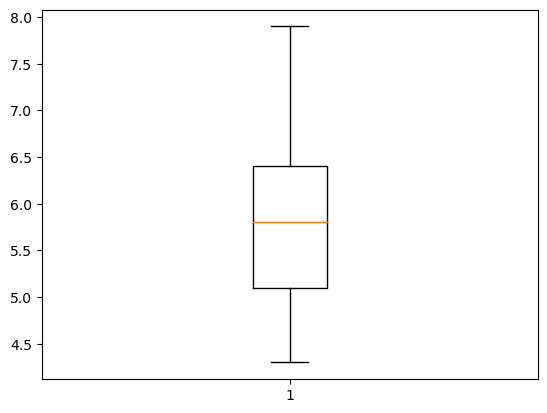

In [22]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x124f0bdced0>,
 'caps': [<matplotlib.lines.Line2D at 0x124f0bde690>,
 'boxes': [<matplotlib.lines.Line2D at 0x124f0bdc390>],
 'medians': [<matplotlib.lines.Line2D at 0x124f0bdfc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x124f0baa010>],
 'means': []}

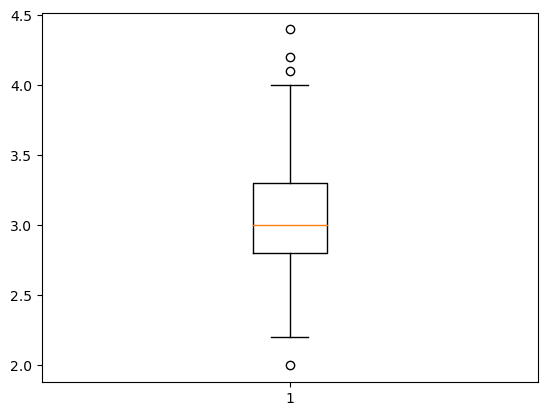

In [23]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x124f0c55c50>,
 'caps': [<matplotlib.lines.Line2D at 0x124f0c57310>,
 'boxes': [<matplotlib.lines.Line2D at 0x124f0c54fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x124f0c60910>],
 'fliers': [<matplotlib.lines.Line2D at 0x124f0bbe350>],
 'means': []}

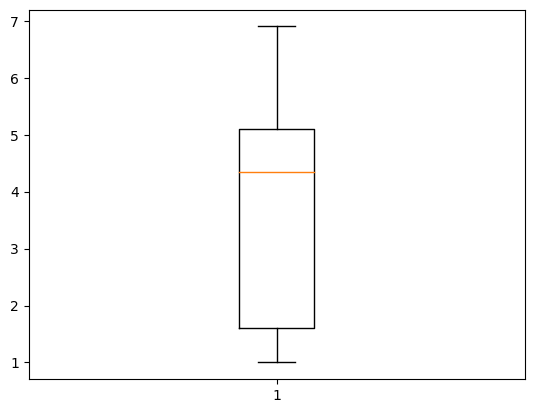

In [24]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x124f0c833d0>,
 'caps': [<matplotlib.lines.Line2D at 0x124f0cc4950>,
 'boxes': [<matplotlib.lines.Line2D at 0x124f0cb2790>],
 'medians': [<matplotlib.lines.Line2D at 0x124f0cc6010>],
 'fliers': [<matplotlib.lines.Line2D at 0x124f0cc6a10>],
 'means': []}

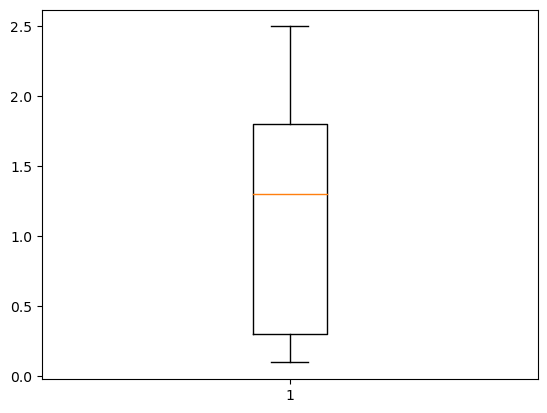

In [25]:
plt.boxplot(df['PetalWidthCm'])

<Axes: >

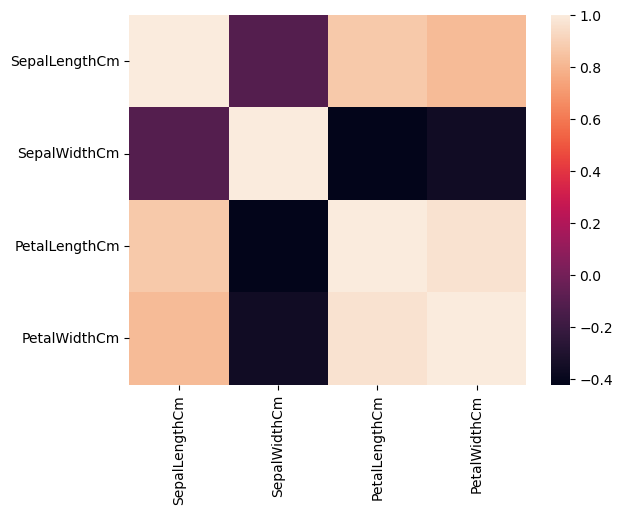

In [31]:
sns.heatmap(df.corr(numeric_only=True))


## Data Preparation


In [74]:
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [ ]:
df.Species=[sp[i] for i in df.Species]

In [42]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [9]:
X=df.iloc[:,0:4]

In [10]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [11]:
y=df.iloc[:,4]

In [12]:
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

## Training the Model

In [14]:
model=LinearRegression()

In [15]:
model.fit(X,y)

LinearRegression()

In [69]:
model.score(X,y)

0.9304223675331595

In [70]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [71]:
model.intercept_

1.192083994828141

 ##  Making Predictions

In [72]:
y_pred=model.predict(X_test)

##  Model Evaluation

In [73]:
print("Mean Squared error : %.2f" % np.mean((y_pred - y_test) ** 2))

Mean Squared error : 0.04
